<a href="https://colab.research.google.com/github/jfpIE16/SL_II_Tareas/blob/master/Tarea_II_SLII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistical Learning II
## Tarea 2: Principal Component Analysis y tSNE
José Fernando Pérez Pérez
---
josefernando.perez@galileo.edu



Importamos las librerías necesarias

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

Cargamos el conjunto de datos Digits Mnist

In [3]:
fashion_mnist = fetch_openml("Fashion-MNIST")
X = fashion_mnist.data
y = fashion_mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


Graficamos una muestra del conjunto de datos.

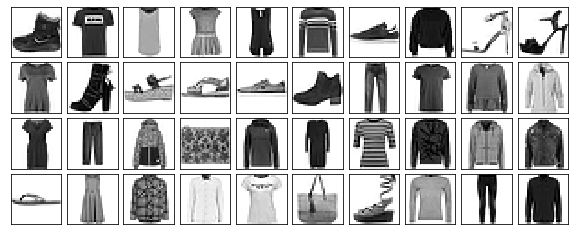

In [4]:
def plot_fashion(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest')
plot_fashion(X)

# PCA utilizando numpy

**Normalización del conjunto de Datos**

In [5]:
X = X / 255.0

**Calculo de eigen valores y vectores**

In [6]:
def eigen_utils(M):
  e_vals, e_vecs = np.linalg.eig(M)
  # Se ordenan de forma descendente
  e_vals, e_vecs = zip(*sorted(zip(list(e_vals), list(e_vecs.T)),key=lambda x: x[0], reverse=True))
  return e_vals, np.array(e_vecs).T

**Reducción de dimensionalidad**

In [7]:
# Calcular matriz de covarianza
x_cov = np.cov(X.T)
print("Matriz de covarianza: "+str(x_cov.shape))
# Calcular eigen valores y vectores de forma ordenada descendente
e_vals, e_vecs = eigen_utils(x_cov)
# Reducimos a 2 dimensiones
N_dim = e_vecs[:, 0:2]
print("Nueva dimensionalidad: "+str(N_dim.shape)) 
# Proyectamos los datos X en las dimensiones N_dim
X_proj = X @ N_dim
print("Proyección: "+str(X_proj.shape))

Matriz de covarianza: (784, 784)
Nueva dimensionalidad: (784, 2)
Proyección: (70000, 2)


**Visualización de los resultados**


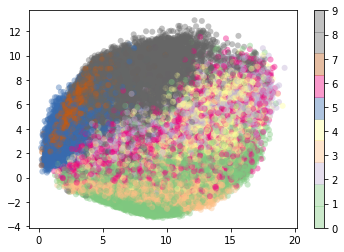

In [8]:
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)

plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=y.astype(int), edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

**Varianza preservada**

In [9]:
# Calculamos la varianza preservada de las primeras 2 componentes
(np.abs(e_vals) / np.sum(e_vals))[0:2].sum()

0.4679504976407662

# tSNE usando Scikit-learn

In [10]:
from sklearn.manifold import TSNE

In [13]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.388s...
[t-SNE] Computed neighbors for 10000 samples in 194.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.692648
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.978409
[t-SNE] KL divergence after 1000 iterations: 1.595613


**Visualización de los resultados**

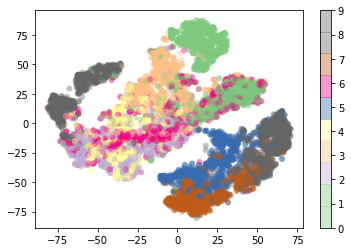

In [16]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.scatter(df_subset['tsne-2d-one'], df_subset['tsne-2d-two'],
            c=df_subset['y'].apply(lambda x: int(x)), edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

# Clustering
Se aplicará el algoritmo K-Means sobre los datos en dos dimensiones obtenidos con PCA.

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(X_proj[:, 0:1])
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.61148882]
 [14.49753607]
 [ 2.79124924]
 [ 9.2017839 ]
 [10.88905551]
 [16.29179591]
 [ 6.01533629]
 [ 1.48821394]
 [ 4.39338759]
 [12.74158098]]


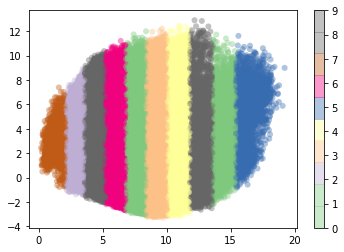

In [18]:
X_clusters = kmeans.predict(X_proj[:, 0:1])
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=X_clusters, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

Al utilizar la técnica Kmeans, se observa que se asignan clusters separados por líneas verticales. Se observa de forma clara que no se asignan a un número esto se demuestra con la gráfica original de PCA.

# Conclusiones


*   Al reducir la dimensionalidad a 2 dimensiones utilizando PCA se preservo un aproximado del 43% de la varianza, sin embargo, se gráfico utilizando un mapa de color denotado por la etiqueta y los datos se interponen entre sí. Esto dificultaría técnicas de clustering utilizando esta información, creería que se debe preservar mas varianza.
*   El algoritmo **tSNE** fue mas costoso computacionalmente, y en este si se nota en ciertos grupos de etiquetas una separación mas evidente, sin embargo, no considero que sea suficiente para aplicar tecnicas de clustering.
*   Se aplico el algoritmo KMeans con las dimensiones obtenidas y no se puede identificar los clusters correctos para cada dígito.

